<a href="https://colab.research.google.com/github/ak283/Sentiment-analysis-of-US-airlines-users-using-a-sequential-NLP-classifier/blob/main/Sentiment__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.ensemble import RandomForestClassifier



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**To Import dataset**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**To read dataset**

In [15]:
import pandas as pd
data=pd.read_csv('drive/My Drive/csv/Tweets.csv')

In [16]:
data.shape

(14640, 15)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [18]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Check for NULL values**

In [19]:
data.isnull().sum(axis=0)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Dropping unnecessary columns from the data set**

In [20]:
data.drop(["tweet_id","airline_sentiment_gold","negativereason_gold", 'tweet_coord'], axis = 1, inplace = True)
data.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [21]:
data.shape                                            #Shape of the data

(14640, 11)

In [22]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**the percentage of public tweets for each airline**

In [23]:
data['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

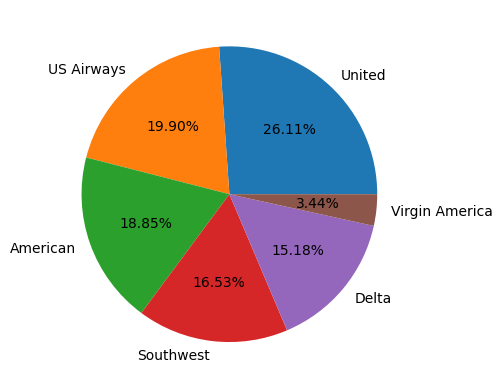

In [24]:
plt.pie(data['airline'].value_counts(), labels=['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America'], autopct='%1.2f%%');

Among all the tweets, majority of tweets are from United customers followed by US Airways customers and least tweets are from Virgin America customers.

**The distribution of sentiment across all the tweets.**

In [25]:
data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

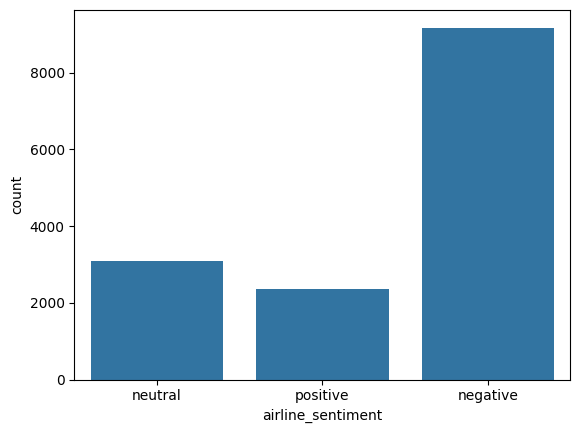

In [26]:
sns.countplot(data, x='airline_sentiment')

Among all the tweets majority of the tweets (9178) are of negative sentiments and only few tweets(2363) are of positive sentiments.

**The distribution of tweets for each airline**

<Axes: xlabel='airline', ylabel='count'>

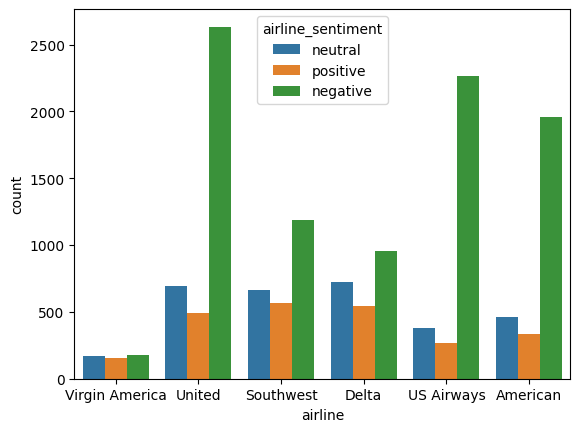

In [27]:
sns.countplot(data, x='airline', hue='airline_sentiment')

United airlines have most negative sentient tweets followed by US Airways and American airlines.

**The distribution of all the negative reason.**

In [28]:
data['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

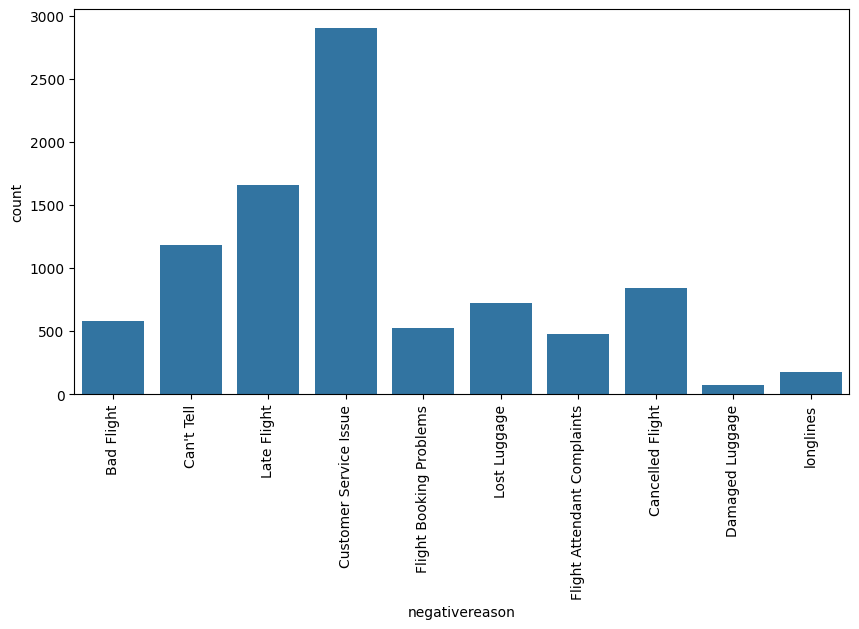

In [29]:
plt.figure(figsize= (10,5))
sns.countplot(data, x='negativereason')
plt.xticks(rotation=90);

Among all the different negative reasons 'Customer service issue' is the major negative sentiment reason and Damaged luggage is the least negative sentiment reason.

 **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data



In [30]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))


data.head()

<ipython-input-30-77ce42ee363c>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [31]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you have added commercials...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I did not today... Must mean I ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it is really aggressive to blas...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it is a really big bad thin...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [32]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you have added commercials...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I did not today... Must mean I ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it is really aggressive to blas...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it is a really big bad thin...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [33]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [34]:
data.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,"[@, VirginAmerica, What, @, dhepburn, said, .]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,"[@, VirginAmerica, plus, you, have, added, com...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,"[@, VirginAmerica, I, did, not, today, ..., Mu...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"[@, VirginAmerica, it, is, really, aggressive,...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,"[@, VirginAmerica, and, it, is, a, really, big...",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [35]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [36]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,virginamerica dhepburn say,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,virginamerica plus add commercials experience ...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,virginamerica not today must mean need take an...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


 **Word Cloud based on Sentiments and Text**

Creating word cloud for negative sentiment

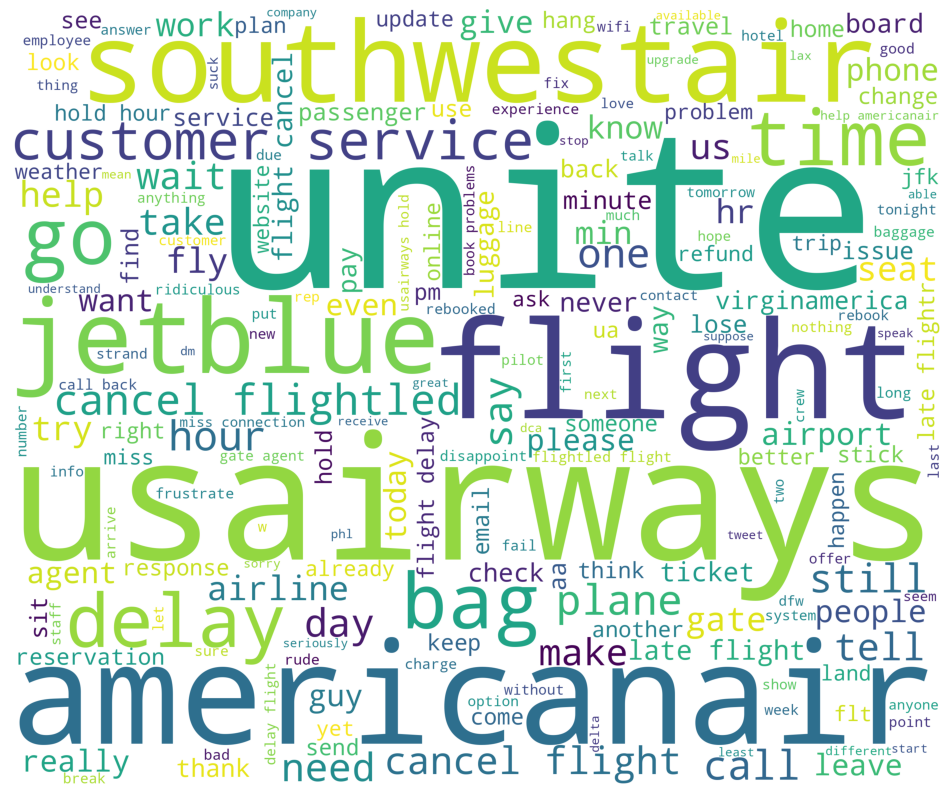

In [37]:


negative_reviews = data[data['airline_sentiment'] == 'negative']

words = ' '.join(negative_reviews['text'])

cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()

Creating word cloud for positive sentiment

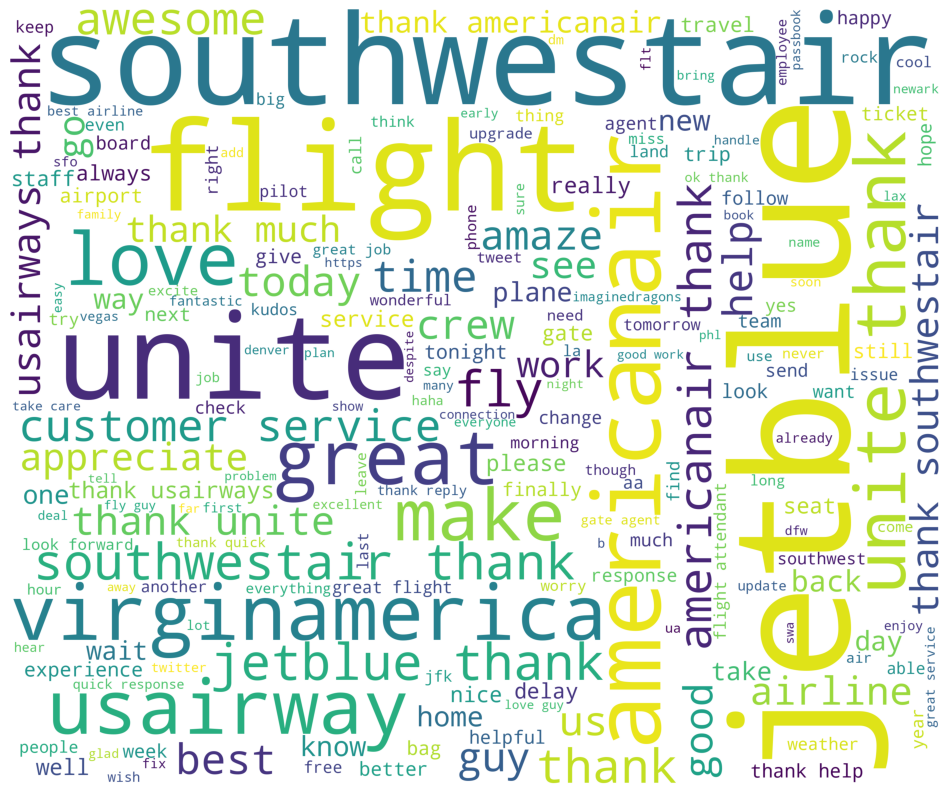

In [38]:


negative_reviews = data[data['airline_sentiment'] == 'positive']

words = ' '.join(negative_reviews['text'])

cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))

plt.imshow(wordcloud)

plt.axis('off')

plt.show()


- We can see the most frequent words choosen by consumers are to express their sentiment for the airlines.

 **Building the model based on CountVectorizer and Random Forest**

Vectorization (Convert text data to numbers).

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

X = data_features.toarray()

In [40]:
data_features.shape

(14640, 2000)

In [41]:
Y = data['airline_sentiment']
#labels = labels.astype('int')

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative','neutral','positive'], yticklabels = ['negative','neutral','positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

Split data into training and testing set.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

 Build a base model for Supervised Learning

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      2814
     neutral       0.59      0.50      0.54       884
    positive       0.76      0.60      0.67       694

    accuracy                           0.78      4392
   macro avg       0.72      0.67      0.69      4392
weighted avg       0.77      0.78      0.77      4392



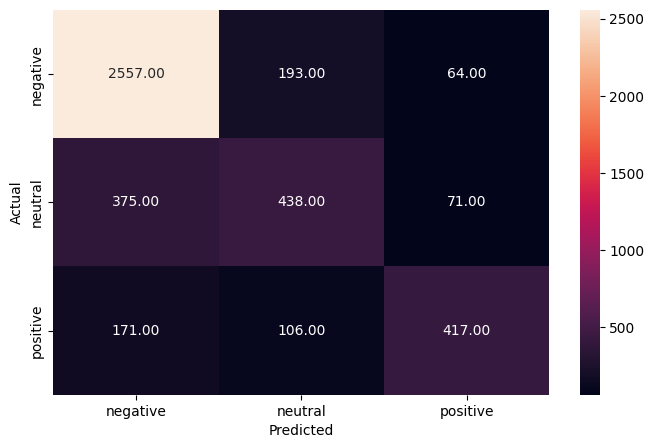

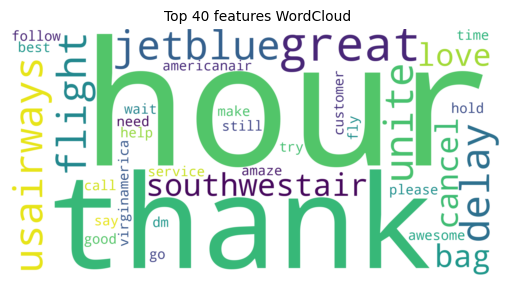

In [44]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

metrics_score(y_test, y_pred_test)

# Addition of top 40 feature into top_feature after training the model
def get_top40_words(model, all_features):

    top_features=''

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','

    from wordcloud import WordCloud

    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000,
                              height = 1000).generate(top_features)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()
 #Instantiate the feature from the vectorizer

features = bow_vec.get_feature_names_out()

get_top40_words(clf,features)


 **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [45]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 5000)

In [46]:
X = data_features

Y = data['airline_sentiment']

In [47]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      2814
     neutral       0.67      0.41      0.51       884
    positive       0.82      0.56      0.66       694

    accuracy                           0.78      4392
   macro avg       0.76      0.64      0.68      4392
weighted avg       0.77      0.78      0.76      4392



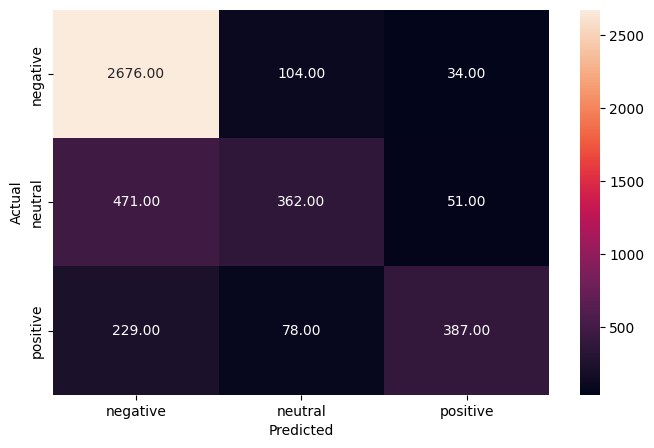

In [48]:
clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train)

y_pred_test1 = clf1.predict(X_test)

metrics_score(y_test, y_pred_test1)

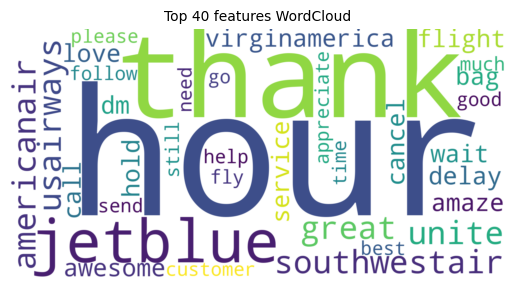

In [49]:
#Instantiate the feature from the vectorizer
features = vectorizer.get_feature_names_out()

get_top40_words(clf1,features)


Comparing the scores of Supervised Learning methods: Count Vectorizer and TF-IDF

In [50]:
df = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

df['count_vectorizer_predicted'] = y_pred_test

df['tf_idf_predicted'] = y_pred_test1

df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,positive,positive,positive
1,negative,negative,negative
2,negative,negative,negative
3,neutral,neutral,neutral
4,negative,neutral,neutral


 **Summary**:

- The goal was to build a model for text-classification.
- We pre-processed the data using various techniques and libraries.
- We created a Word Cloud plot based on sentiments.
- The pre-processed data is converted to numbers (vectorized), so that we can feed the data into the model.
- We trained the model and optimized the parameter, which led to an increase the overall accuracy.
- After building the classification model, we predicted the results for the test data.
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform with the accuracy of 78% .
- However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building
- We can also increase the max_feature parameter in the vectorizer.
